In [1786]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

# EDA Part

In [1787]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1788]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1789]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1790]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1791]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

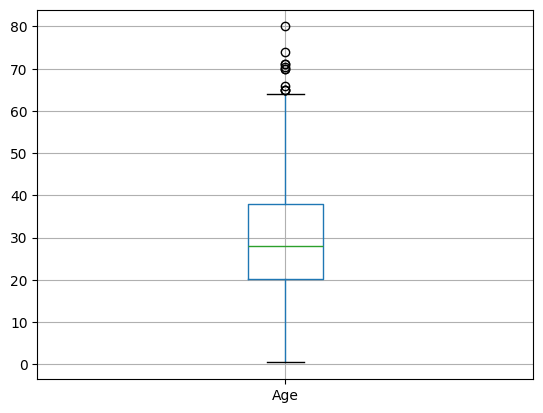

In [1792]:
df_train.boxplot(column="Age")

In [1793]:
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])

In [1794]:
age_nan_mask = df_train["Age"].isna()
test_age_nan_mask = df_test["Age"].isna()

missing_size = age_nan_mask.sum()
test_missing_size = test_age_nan_mask.sum()

random_ages = np.random.normal(loc=28, scale=14, size=missing_size)
test_random_ages = np.random.normal(loc=27, scale=14, size=test_missing_size)

df_train.loc[age_nan_mask, "Age"] = random_ages
df_test.loc[test_age_nan_mask, "Age"] = test_random_ages


In [1795]:
df_train = df_train.drop(columns=["Name", "PassengerId"])
df_test = df_test.drop(columns=["Name"])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [1796]:
df_train["Cabin"] = df_train["Cabin"].fillna("No_Attr")
df_test["Cabin"] = df_test["Cabin"].fillna("No_Attr")

In [1797]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [1798]:
df_test.fillna(df_test["Fare"].mode()[0], inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [1799]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,No_Attr,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,No_Attr,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,No_Attr,S


<Axes: >

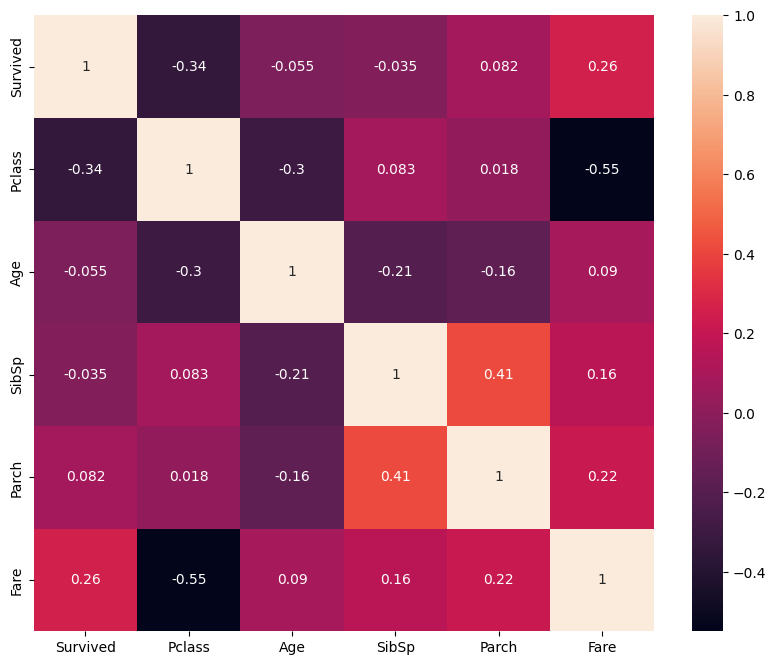

In [1800]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(numeric_only=True),annot=True)

In [1801]:
import category_encoders as ce
category_columns = ["Ticket", "Cabin", "Embarked", "Sex"]
numeric_columns = ["Age", "Pclass", "SibSp", "Parch", "Fare"]

encoder = ce.OneHotEncoder(cols=category_columns)
encoded_df = encoder.fit_transform(df_train[category_columns])
df_train = pd.concat([df_train[numeric_columns], encoded_df, df_train["Survived"]], axis=1)

df_train.head()

,Age,Pclass,SibSp,Parch,Fare,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Ticket_10,Ticket_11,Ticket_12,Ticket_13,Ticket_14,Ticket_15,Ticket_16,Ticket_17,Ticket_18,Ticket_19,Ticket_20,Ticket_21,Ticket_22,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_27,Ticket_28,Ticket_29,Ticket_30,Ticket_31,Ticket_32,Ticket_33,Ticket_34,Ticket_35,...,Cabin_115,Cabin_116,Cabin_117,Cabin_118,Cabin_119,Cabin_120,Cabin_121,Cabin_122,Cabin_123,Cabin_124,Cabin_125,Cabin_126,Cabin_127,Cabin_128,Cabin_129,Cabin_130,Cabin_131,Cabin_132,Cabin_133,Cabin_134,Cabin_135,Cabin_136,Cabin_137,Cabin_138,Cabin_139,Cabin_140,Cabin_141,Cabin_142,Cabin_143,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Cabin_148,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,Survived
0,22.0,3,1,0,7.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38.0,1,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,26.0,3,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,35.0,1,1,0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,35.0,3,0,0,8.0500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [1802]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Finding best hyperparameters


In [1803]:

y = df_train["Survived"]
x = df_train.drop(columns=["Survived"])

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 300, 400, 500],  
    'max_depth': [None, 3, 5, 10, 20], 
    'min_samples_split': [2, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 4, 8, 16]  
}

rf = RandomForestClassifier(random_state=seed)

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=10,
    scoring='accuracy',  
    n_jobs=-1, 
)

grid_search.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 20, 50, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [1804]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score:  0.8372284644194756


# Training model


In [1805]:
clf = grid_search.best_estimator_
clf.fit(x, y)

RandomForestClassifier(n_estimators=300, random_state=42)

# Preparing test data

In [1806]:
encoded_df = encoder.transform(df_test[category_columns])
df_test = pd.concat([df_test[numeric_columns], encoded_df, df_test["PassengerId"]], axis=1)

df_test.head(5)

,Age,Pclass,SibSp,Parch,Fare,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Ticket_10,Ticket_11,Ticket_12,Ticket_13,Ticket_14,Ticket_15,Ticket_16,Ticket_17,Ticket_18,Ticket_19,Ticket_20,Ticket_21,Ticket_22,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_27,Ticket_28,Ticket_29,Ticket_30,Ticket_31,Ticket_32,Ticket_33,Ticket_34,Ticket_35,...,Cabin_115,Cabin_116,Cabin_117,Cabin_118,Cabin_119,Cabin_120,Cabin_121,Cabin_122,Cabin_123,Cabin_124,Cabin_125,Cabin_126,Cabin_127,Cabin_128,Cabin_129,Cabin_130,Cabin_131,Cabin_132,Cabin_133,Cabin_134,Cabin_135,Cabin_136,Cabin_137,Cabin_138,Cabin_139,Cabin_140,Cabin_141,Cabin_142,Cabin_143,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Cabin_148,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,PassengerId
0,34.5,3,0,0,7.8292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,892
1,47.0,3,1,0,7.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,893
2,62.0,2,0,0,9.6875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,894
3,27.0,3,0,0,8.6625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,895
4,22.0,3,1,1,12.2875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,896


In [1807]:
ids = df_test["PassengerId"]
predicitons = clf.predict(df_test.drop(columns=["PassengerId"]))
submission = np.column_stack((ids, predicitons)).astype(int)

submission_df = pd.DataFrame(submission, columns=["PassengerId", "Survived"])
submission_df.to_csv("submission.csv", index=False)